Create a plot of streamfunction in southern ocean -- geotimescales project.<br>
Overlay it on mean and anomalous temperature. Then calculate heat transport of anomalous W working on the mean Temp.<br>
<br>
<ul>
<li>Figure 1: Climatological Eulerian MOC (1970-1999 mean)</li>
<li>Figure 2: Sulfate engineering anomalous Eulerian MOC (2045-2054 compared to climo)</li>
<li>Figure 3: GHG removal anomalous Eulerian MOC (2045-2054 compared to climo)</li>
<li>Figure 4: Climatological TEMP (1970-1999 mean) with sulfate engineering anom eulerian MOC (contours)</li>
</ul>
<br>
For figures 1-4: + MOC has solid lines (cw), - MOC has dashed lines (ccw). no zero contour.
<br><br>
<ul>
<li>Figure 5: Anomalous TEMP (shading) with anomalous eulerian MOC (contours) for sulfate eng (left), ghg removal (right)</li>
<li>Figure 6: Same as Fig. 5 but anomalous eddy-induced MOC</li>
<li>Figure 7: Same as Fig. 5 but anomalous total MOC (eulerian + eddy-induced)</li>
<li>Figure 8: Same as Fig. 7 but zoomed closer in on SH region</li>
<li>Figure 9: Same as Fig. 5 but anomalous submeso-scale eddy MOC</li>
</ul>
<br>
For figures 5-9: + MOC has thick solid lines (cw), - MOC has thin solid lines (ccw). no zero contour.
<br><br>
<ul>
<li>Figure 10a: components of heat trans calc for sulfates run: climo dT/dz; anomalous WVEL+WISOP; anom WVEL; anom WISOP</li>
<li>Figure 10b: Heating rate (wprime*dTbar/dz; K/s) at each level for sulfate engineering (left) and GHG removal (right)</li>
<li>Figure 11: same as Fig. 10 but in K/day and zoomed in</li>
<li>Figure 12: Same as Fig. 10, but multiply by layer thickness to convert to W/m2 in each grid cell. Overlaid with climo TEMP contours (gray) and anomalous eulerian MOC (green)</li>
</ul>
<br>
For figures 10-12: having trouble removing the spurious data in lower left. It's probably related to the bathymetry and not appropriately handling missing data.
<br><br>
<em>Figure headings are below the figures</em>

In [1]:
%matplotlib inline 

import cccmaplots as cplt
import cccmaNC as cnc

printtofile=False

basepath = '/Users/kelly/School/DATA/'

casenamec = 'b40.20th.track1.1deg.006'
casenamep = 'geo2035ensavg' # or 'rcp8_5GHGrem1850'

filenamec = basepath + casenamec + '/' + casenamec + '.pop.ANN.1970-1999.nc'
filenamep = basepath + casenamep + '/' + casenamep + '.pop.ANN.2045-2054.nc'

print filenamec
print filenamep



/Users/kelly/School/DATA/b40.20th.track1.1deg.006/b40.20th.track1.1deg.006.pop.ANN.1970-1999.nc
/Users/kelly/School/DATA/geo2035ensavg/geo2035ensavg.pop.ANN.2045-2054.nc


In [2]:
latauxgrid = cnc.getNCvar(filenamec,'lat_aux_grid')
transreg = cnc.getNCvar(filenamec, 'transport_regions')
moccomp = cnc.getNCvar(filenamec, 'moc_components')
mocz = cnc.getNCvar(filenamec,'moc_z')


""" float MOC(time, transport_reg, moc_comp, moc_z, lat_aux_grid) ;
                MOC:long_name = "Meridional Overturning Circulation" ;
                MOC:units = "Sverdrups" ;
                MOC:coordinates = "lat_aux_grid moc_z moc_components transport_region time" ;
                MOC:missing_value = 9.96921e+36f ;
                
                
    transport_regions =
  "Global Ocean - Marginal Seas",
  "Atlantic Ocean + Mediterranean Sea + Labrador Sea + GIN Sea + Arctic Ocean + Hudson Bay" 
  
    moc_components =
  "Eulerian Mean",
  "Eddy-Induced (bolus)",
  "Submeso" ;
   
     float moc_z(moc_z) ;
                moc_z:long_name = "depth from surface to top of layer" ;
                moc_z:units = "centimeters" ;
                moc_z:positive = "down" ;
                moc_z:valid_min = 0.f ;
                moc_z:valid_max = 549999.1f ;
                
    moc_z = 0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 
    11000, 12000, 13000, 14000, 15000, 16000, 17019.68, 18076.13, 19182.12, 
    20349.93, 21592.34, 22923.31, 24358.45, 25915.58, 27615.26, 29481.47, 
    31542.37, 33831.23, 36387.47, 39258.05, 42498.89, 46176.66, 50370.69, 
    55174.91, 60699.67, 67072.86, 74439.8, 82960.7, 92804.35, 104136.8, 
    117104, 131809.4, 148290.1, 166499.2, 186301.4, 207487.4, 229803.9, 
    252990.4, 276809.8, 301067.1, 325613.8, 350344.9, 375189.2, 400101.2, 
    425052.5, 450026.1, 475012, 500004.7, 525000.9, 549999.1 ;
"""

totmocc = cnc.getNCvar(filenamec,'MOC')
totmocp = cnc.getNCvar(filenamep,'MOC')

print totmocc.shape 
mocc=totmocc[0,0,0,...]
print mocc.shape

print totmocp.shape
mocp=totmocp[0,0,0,...]


(1, 2, 3, 61, 395)
(61, 395)
(1, 2, 3, 61, 395)


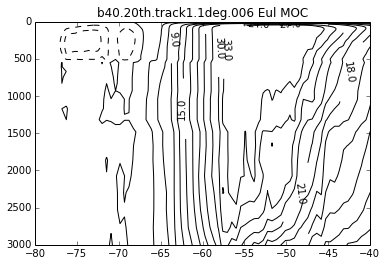

In [3]:
lats,levs = np.meshgrid(latauxgrid,mocz/100.)

contsp = np.arange(0,36,3)#[0,2,4,6,8,10,12,14,16,18,20]
contsn = np.arange(-10,-.5,.5)

fig = plt.figure()
ax = fig.add_subplot(111)
CS1 = plt.contour(lats,levs,mocc,contsp,\
            colors='k',linestyles='solid')
plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = plt.contour(lats,levs,mocc,contsn,\
            colors='k',linestyles='dashed')
plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)

ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((-80,-40))
ax.set_title(casenamec + ' Eul MOC')


### Fig. 1: Climo Eulerian MOC (1970-1999)

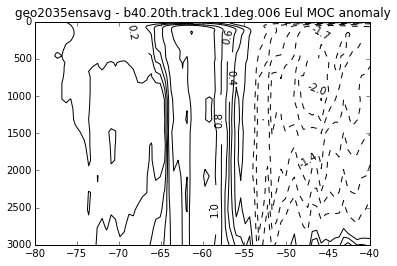

In [4]:
contspd = np.arange(0,5,.2)
contsnd = np.arange(-5,-.2,.3)

fig = plt.figure()
ax = fig.add_subplot(111)
CS1 = plt.contour(lats,levs,mocp-mocc,contspd,\
            colors='k',linestyles='solid')
plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = plt.contour(lats,levs,mocp-mocc,contsnd,\
            colors='k',linestyles='dashed')
plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
#CS1 = plt.contour(lats,levs,mocp-mocc,[0,0],\
#            colors='r',linestyles='solid')

ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((-80,-40))
ax.set_title(casenamep + ' - ' + casenamec + ' Eul MOC anomaly')

### Fig. 2: Sulfate engineering (geo2035ensavg): Anomalous Eulerian MOC

/Users/kelly/School/DATA/geo2035ensavg/geo2035ensavg.pop.ANN.2045-2054.nc


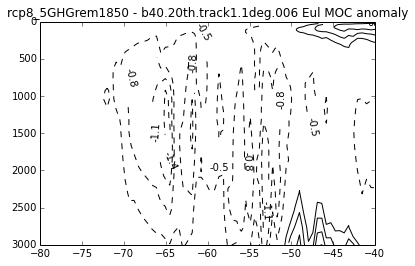

In [5]:
casenamep2 = 'rcp8_5GHGrem1850' # or 'rcp8_5GHGrem1850'
filenamep2 = basepath + casenamep2 + '/' + casenamep2 + '.pop.ANN.2045-2054.nc'

print filenamep
totmocp2 = cnc.getNCvar(filenamep2,'MOC')
mocp2=totmocp2[0,0,0,...]

contspd = np.arange(.2,5,.2)
contsnd = np.arange(-5,-.2,.3)


fig = plt.figure()
ax = fig.add_subplot(111)
CS1 = plt.contour(lats,levs,mocp2-mocc,contspd,\
            colors='k',linestyles='solid')
plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = plt.contour(lats,levs,mocp2-mocc,contsnd,\
            colors='k',linestyles='dashed')
plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
#CS1 = plt.contour(lats,levs,mocp-mocc,[0,0],\
#            colors='r',linestyles='solid')

ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((-80,-40))
ax.set_title(casenamep2 + ' - ' + casenamec + ' Eul MOC anomaly')

### Fig. 3: GHG removal (rcp8_5GHGrem1850): Anomalous Eulerian MOC

In [6]:
kmt = cnc.getNCvar(filenamec,'KMT')


# Now add TEMP
tempc = np.squeeze(cnc.getNCvar(filenamec,'TEMP'))
tempp = np.squeeze(cnc.getNCvar(filenamep,'TEMP'))
tempp2 = np.squeeze(cnc.getNCvar(filenamep2,'TEMP'))
zt = cnc.getNCvar(filenamec, 'z_t')
tlat = cnc.getNCvar(filenamec,'TLAT')


print tempc.shape
import numpy.ma as ma

for lii,zz in enumerate(zt):
    # first mask out levels below sea floor
    tempc[lii,...] = ma.masked_where(kmt <= lii,tempc[lii,...])
    tempp[lii,...] = ma.masked_where(kmt <= lii,tempp[lii,...])
    tempp2[lii,...] = ma.masked_where(kmt <= lii,tempp2[lii,...])
    
tempc=np.squeeze(np.mean(tempc,axis=2))
tempp=np.squeeze(np.mean(tempp,axis=2))
tempp2=np.squeeze(np.mean(tempp2,axis=2))

print tempc.shape

(60, 384, 320)
(60, 384)


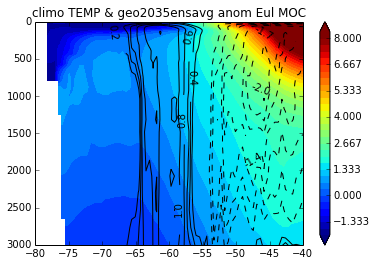

In [7]:
tlats,zlevs = np.meshgrid(np.squeeze(tlat[:,1]),zt/100.)
cmap='jet'
cmin=-2; cmax=8

#cmlen=float( plt.cm.get_cmap(cmap).N) # or: from __future__ import division
cmlen=float(30)
incr = (cmax-cmin) / (cmlen)
conts = np.arange(cmin,cmax+incr,incr)

fig = plt.figure()
ax = fig.add_subplot(111)
CF1 = plt.contourf(tlats,zlevs,tempc,cmap=cmap,vmin=cmin,vmax=cmax,levels=conts,extend='both')


contspd = np.arange(.2,5,.2)
contsnd = np.arange(-5,-.2,.3)


CS1 = plt.contour(lats,levs,mocp-mocc,contspd,\
            colors='k',linestyles='solid')
plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = plt.contour(lats,levs,mocp-mocc,contsnd,\
            colors='k',linestyles='dashed')
plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)


ax.set_ylim((0,3000))
ax.invert_yaxis()
ax.set_xlim((-80,-40))
ax.set_title('climo TEMP & ' + casenamep + ' anom Eul MOC')
cbar = fig.colorbar(CF1)

### Fig. 4: Climo TEMP (shading) with sulfate enginering anomalous Eulerian MOC (contours)

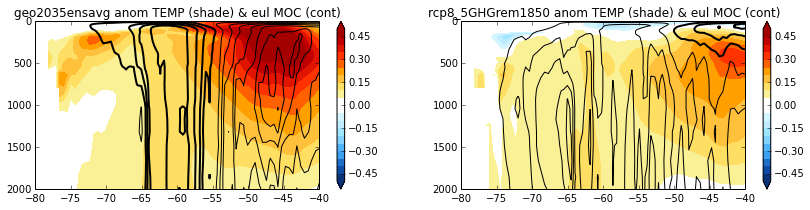

In [8]:
# EULERIAN MOC


cmap='blue2red_w20'
cmin=-.5; cmax=.5
printtofile=False
moctype='eul'

#cmlen=float( plt.cm.get_cmap(cmap).N) # or: from __future__ import division
cmlen=float(20)
incr = (cmax-cmin) / (cmlen)
conts = np.arange(cmin,cmax+incr,incr)

fig = plt.figure()
fig.set_size_inches(14,3)
ax = fig.add_subplot(121)
CF1 = plt.contourf(tlats,zlevs,tempp-tempc,cmap=cmap,vmin=cmin,vmax=cmax,levels=conts,extend='both')

# contours for MOC anomaly
contspd = np.arange(.1,5,.3)
contsnd = np.arange(-5,-.1,.3)


CS1 = plt.contour(lats,levs,mocp-mocc,contspd,\
            colors='k',linestyles='solid',linewidths=2)
#plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = plt.contour(lats,levs,mocp-mocc,contsnd,\
            colors='k',linestyles='solid')
#plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)

ax.set_ylim((0,2000))
ax.invert_yaxis()
ax.set_xlim((-80,-40))
ax.set_title(casenamep + ' anom TEMP (shade) & ' + moctype + ' MOC (cont)')
cbar = fig.colorbar(CF1)



ax2 = fig.add_subplot(122)
CF2 = plt.contourf(tlats,zlevs,tempp2-tempc,cmap=cmap,vmin=cmin,vmax=cmax,levels=conts,extend='both')


CS2 = plt.contour(lats,levs,mocp2-mocc,contspd,\
            colors='k',linestyles='solid',linewidths=2)
#plt.clabel(CS2,fmt = '%2.1f',inline=1,fontsize=10)
CS2 = plt.contour(lats,levs,mocp2-mocc,contsnd,\
            colors='k',linestyles='solid')
#plt.clabel(CS2,fmt = '%2.1f',inline=1,fontsize=10)

ax2.set_ylim((0,2000))
ax2.invert_yaxis()
ax2.set_xlim((-80,-40))
ax2.set_title(casenamep2 + ' anom TEMP (shade) & ' + moctype + ' MOC (cont)')
cbar = fig.colorbar(CF2)
if printtofile:
    fig.savefig('MOC' + moctype + 'anom_climoTEMP_subplotSHzm.pdf')

### Fig. 5: Anomalous TEMP (shading) with anomalous Eulerian MOC in contours (left: sulfate, right: ghgrem)

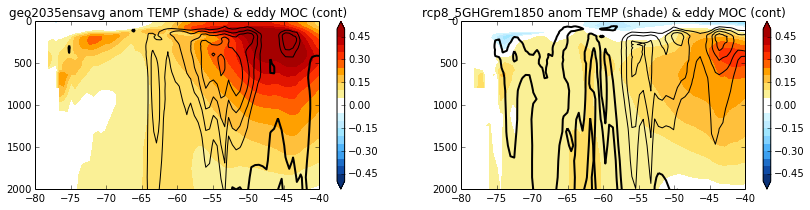

In [9]:
# EDDY-INDUCED MOC

cmap='blue2red_w20'
cmin=-.5; cmax=.5

#cmlen=float( plt.cm.get_cmap(cmap).N) # or: from __future__ import division
cmlen=float(20)
incr = (cmax-cmin) / (cmlen)
conts = np.arange(cmin,cmax+incr,incr)

plotmoc = totmocp[0,0,1,...]-totmocc[0,0,1,...] # eddy-induced
plotmoc2 = totmocp2[0,0,1,...]-totmocc[0,0,1,...] # eddy-induced

moctype='eddy'

fig = plt.figure()
fig.set_size_inches(14,3)
ax = fig.add_subplot(121)
CF1 = plt.contourf(tlats,zlevs,tempp-tempc,cmap=cmap,vmin=cmin,vmax=cmax,levels=conts,extend='both')

# contours for MOC anomaly
contspd = np.arange(.2,5,.3)
contsnd = np.arange(-5,-.2,.3)

CS1 = plt.contour(lats,levs,plotmoc,contspd,\
            colors='k',linestyles='solid',linewidths=2)
#plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = plt.contour(lats,levs,plotmoc,contsnd,\
            colors='k',linestyles='solid')
#plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)

ax.set_ylim((0,2000))
ax.invert_yaxis()
ax.set_xlim((-80,-40))
ax.set_title(casenamep + ' anom TEMP (shade) & ' + moctype + ' MOC (cont)')
cbar = fig.colorbar(CF1)



ax2 = fig.add_subplot(122)
CF2 = plt.contourf(tlats,zlevs,tempp2-tempc,cmap=cmap,vmin=cmin,vmax=cmax,levels=conts,extend='both')


CS2 = plt.contour(lats,levs,plotmoc2,contspd,\
            colors='k',linestyles='solid',linewidths=2)
#plt.clabel(CS2,fmt = '%2.1f',inline=1,fontsize=10)
CS2 = plt.contour(lats,levs,plotmoc2,contsnd,\
            colors='k',linestyles='solid')
#plt.clabel(CS2,fmt = '%2.1f',inline=1,fontsize=10)

ax2.set_ylim((0,2000))
ax2.invert_yaxis()
ax2.set_xlim((-80,-40))
ax2.set_title(casenamep2 + ' anom TEMP (shade) & ' + moctype + ' MOC (cont)')
cbar = fig.colorbar(CF2)

if printtofile:
    fig.savefig('MOC' + moctype + 'anom_climoTEMP_subplotSHzm.pdf')

### Fig. 6: Anomalous TEMP (shading) with anomalous Eddy-induced MOC in contours (left: sulfate, right: ghgrem)

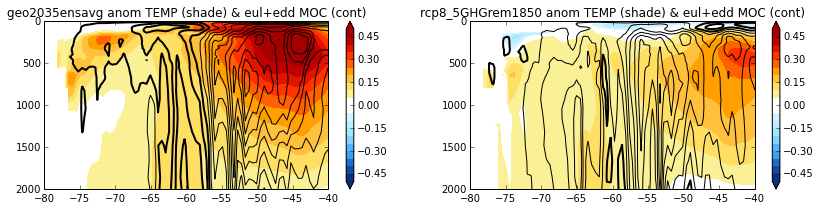

In [10]:
# TOTAL (EULERIAN + EDDY-INDUCED) MOC

cmap='blue2red_w20'
cmin=-.5; cmax=.5
printtofile=False

#cmlen=float( plt.cm.get_cmap(cmap).N) # or: from __future__ import division
cmlen=float(20)
incr = (cmax-cmin) / (cmlen)
conts = np.arange(cmin,cmax+incr,incr)

plotmoc = (totmocp[0,0,1,...]+totmocp[0,0,0,...])-(totmocc[0,0,1,...]+totmocc[0,0,0,...]) # Eulerian+eddy-induced
plotmoc2 = (totmocp2[0,0,1,...]+totmocp2[0,0,0,...])-(totmocc[0,0,1,...]+totmocc[0,0,0,...]) # Eulerian+eddy-induced

moctype='eul+edd'

fig = plt.figure()
fig.set_size_inches(14,3)
ax = fig.add_subplot(121)
CF1 = plt.contourf(tlats,zlevs,tempp-tempc,cmap=cmap,vmin=cmin,vmax=cmax,levels=conts,extend='both')

# contours for MOC anomaly
contspd = np.arange(.1,5,.3)
contsnd = np.arange(-5,-.1,.3)

CS1 = plt.contour(lats,levs,plotmoc,contspd,\
            colors='k',linestyles='solid',linewidths=2)
#plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = plt.contour(lats,levs,plotmoc,contsnd,\
            colors='k',linestyles='solid')
#plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)

ax.set_ylim((0,2000))
ax.invert_yaxis()
ax.set_xlim((-80,-40))
ax.set_title(casenamep + ' anom TEMP (shade) & ' + moctype + ' MOC (cont)')
cbar = fig.colorbar(CF1)



ax2 = fig.add_subplot(122)
CF2 = plt.contourf(tlats,zlevs,tempp2-tempc,cmap=cmap,vmin=cmin,vmax=cmax,levels=conts,extend='both')


CS2 = plt.contour(lats,levs,plotmoc2,contspd,\
            colors='k',linestyles='solid',linewidths=2)
#plt.clabel(CS2,fmt = '%2.1f',inline=1,fontsize=10)
CS2 = plt.contour(lats,levs,plotmoc2,contsnd,\
            colors='k',linestyles='solid')
#plt.clabel(CS2,fmt = '%2.1f',inline=1,fontsize=10)

ax2.set_ylim((0,2000))
ax2.invert_yaxis()
ax2.set_xlim((-80,-40))
ax2.set_title(casenamep2 + ' anom TEMP (shade) & ' + moctype + ' MOC (cont)')
cbar = fig.colorbar(CF2)

if printtofile:
    fig.savefig('MOC' + moctype + 'anom_climoTEMP_subplotSHzm.pdf')

### Fig. 7: Same as above, but total anomalous MOC (Eulerian + eddy-induced)

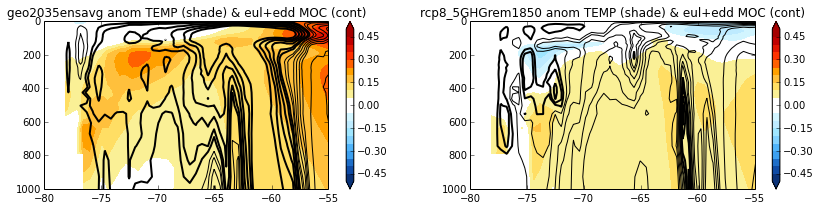

In [11]:
# ZOOM: TOTAL (EULERIAN + EDDY-INDUCED) MOC

cmap='blue2red_w20'
cmin=-.5; cmax=.5
printtofile=False

#cmlen=float( plt.cm.get_cmap(cmap).N) # or: from __future__ import division
cmlen=float(20)
incr = (cmax-cmin) / (cmlen)
conts = np.arange(cmin,cmax+incr,incr)

plotmoc = (totmocp[0,0,1,...]+totmocp[0,0,0,...])-(totmocc[0,0,1,...]+totmocc[0,0,0,...]) # Eulerian+eddy-induced
plotmoc2 = (totmocp2[0,0,1,...]+totmocp2[0,0,0,...])-(totmocc[0,0,1,...]+totmocc[0,0,0,...]) # Eulerian+eddy-induced

moctype='eul+edd'

fig = plt.figure()
fig.set_size_inches(14,3)
ax = fig.add_subplot(121)
CF1 = plt.contourf(tlats,zlevs,tempp-tempc,cmap=cmap,vmin=cmin,vmax=cmax,levels=conts,extend='both')

# contours for MOC anomaly
#contspd = np.arange(.01,5,.1)
contspd = [.05,.1,.2,.3,.4,.5,1,1.5]

#contsnd = np.arange(-5,-.01,.1)
contsnd = [-1.5,-1,-.5,-.4,-.3,-.2,-.1,-.05]

CS1 = plt.contour(lats,levs,plotmoc,contspd,\
            colors='k',linestyles='solid',linewidths=2)
#plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = plt.contour(lats,levs,plotmoc,contsnd,\
            colors='k',linestyles='solid')
#plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)

ax.set_ylim((0,1000))
ax.invert_yaxis()
ax.set_xlim((-80,-55))
ax.set_title(casenamep + ' anom TEMP (shade) & ' + moctype + ' MOC (cont)')
cbar = fig.colorbar(CF1)



ax2 = fig.add_subplot(122)
CF2 = plt.contourf(tlats,zlevs,tempp2-tempc,cmap=cmap,vmin=cmin,vmax=cmax,levels=conts,extend='both')


CS2 = plt.contour(lats,levs,plotmoc2,contspd,\
            colors='k',linestyles='solid',linewidths=2)
#plt.clabel(CS2,fmt = '%2.1f',inline=1,fontsize=10)
CS2 = plt.contour(lats,levs,plotmoc2,contsnd,\
            colors='k',linestyles='solid')
#plt.clabel(CS2,fmt = '%2.1f',inline=1,fontsize=10)

ax2.set_ylim((0,1000))
ax2.invert_yaxis()
ax2.set_xlim((-80,-55))
ax2.set_title(casenamep2 + ' anom TEMP (shade) & ' + moctype + ' MOC (cont)')
cbar = fig.colorbar(CF2)

if printtofile:
    fig.savefig('MOC' + moctype + 'anom_climoTEMP_subplotSHzmZOOM.pdf')

### Fig. 8: Same as Fig. 7 (total MOC) but zoomed in

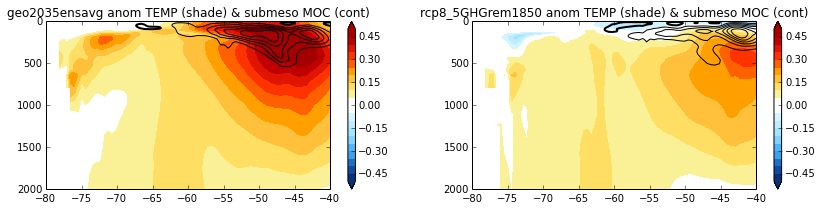

In [12]:
# SUBMESO-SCALE EDDY

cmap='blue2red_w20'
cmin=-.5; cmax=.5
printtofile=False


#cmlen=float( plt.cm.get_cmap(cmap).N) # or: from __future__ import division
cmlen=float(20)
incr = (cmax-cmin) / (cmlen)
conts = np.arange(cmin,cmax+incr,incr)

plotmoc = totmocp[0,0,2,...]-totmocc[0,0,2,...] # submeso
plotmoc2 = totmocp2[0,0,2,...]-totmocc[0,0,2,...] # submeso

moctype='submeso'

fig = plt.figure()
fig.set_size_inches(14,3)
ax = fig.add_subplot(121)
CF1 = plt.contourf(tlats,zlevs,tempp-tempc,cmap=cmap,vmin=cmin,vmax=cmax,levels=conts,extend='both')

# contours for MOC anomaly
contspd = np.arange(.1,5,.2)
contsnd = np.arange(-5,-.1,.2)

CS1 = plt.contour(lats,levs,plotmoc,contspd,\
            colors='k',linestyles='solid',linewidths=2)
#plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CS1 = plt.contour(lats,levs,plotmoc,contsnd,\
            colors='k',linestyles='solid')
#plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)

ax.set_ylim((0,2000))
ax.invert_yaxis()
ax.set_xlim((-80,-40))
ax.set_title(casenamep + ' anom TEMP (shade) & ' + moctype + ' MOC (cont)')
cbar = fig.colorbar(CF1)



ax2 = fig.add_subplot(122)
CF2 = plt.contourf(tlats,zlevs,tempp2-tempc,cmap=cmap,vmin=cmin,vmax=cmax,levels=conts,extend='both')


CS2 = plt.contour(lats,levs,plotmoc2,contspd,\
            colors='k',linestyles='solid',linewidths=2)
#plt.clabel(CS2,fmt = '%2.1f',inline=1,fontsize=10)
CS2 = plt.contour(lats,levs,plotmoc2,contsnd,\
            colors='k',linestyles='solid')
#plt.clabel(CS2,fmt = '%2.1f',inline=1,fontsize=10)

ax2.set_ylim((0,2000))
ax2.invert_yaxis()
ax2.set_xlim((-80,-40))
ax2.set_title(casenamep2 + ' anom TEMP (shade) & ' + moctype + ' MOC (cont)')
cbar = fig.colorbar(CF2)

if printtofile:
    fig.savefig('MOC' + moctype + 'anom_climoTEMP_subplotSHzm.pdf')

### Fig. 9: same as Figs 5,6, etc but submeso-scale eddy MOC

### Next, Calculate wprime*dTbar/dz at all levels

In [13]:
print filenamec
print filenamep
print filenamep2

kmt = cnc.getNCvar(filenamec,'KMT')

wvc = np.squeeze(cnc.getNCvar(filenamec,'WVEL'))/100. # convert to m/s
wic = np.squeeze(cnc.getNCvar(filenamec,'WISOP'))/100.

wvp = np.squeeze(cnc.getNCvar(filenamep,'WVEL'))/100.
wip = np.squeeze(cnc.getNCvar(filenamep,'WISOP'))/100.

wvp2 = np.squeeze(cnc.getNCvar(filenamep2,'WVEL'))/100.
wip2 = np.squeeze(cnc.getNCvar(filenamep2,'WISOP'))/100.

# for each level, calc wprime*dTvar/dz
wprime = (wvp+wip)-(wvc+wic)
wprime2= (wvp2+wip2)-(wvc+wic)
wvelprime = wvp-wvc
wisopprime = wip-wic
wvelprime2 = wvp2-wvc
wisopprime2 = wip2-wic


print wprime.shape

# use index-of deepest grid cell to determine if the cell should be included in zonal mean
#   for each level: 
#       if kmt<=level index:
#            mask the cell
# aka: for each level, mask where kmt<=level index
import numpy.ma as ma
import scipy.stats

for lii,zz in enumerate(zt):
    # first mask out levels below sea floor
    wprime[lii,...] = ma.masked_where(kmt <= lii,wprime[lii,...])
    wprime2[lii,...] = ma.masked_where(kmt <= lii,wprime2[lii,...])
    wvelprime[lii,...] = ma.masked_where(kmt <= lii,wvelprime[lii,...])
    wvelprime2[lii,...] = ma.masked_where(kmt <= lii,wvelprime2[lii,...])
    wisopprime[lii,...] = ma.masked_where(kmt <= lii,wisopprime[lii,...])
    wisopprime2[lii,...] = ma.masked_where(kmt <= lii,wisopprime2[lii,...])

#plt.figure()
#plt.pcolor(wprime[10,...],vmin=-2e-6,vmax=2e-6)
#plt.colorbar()

# Now take zonal mean    
#wprime = np.squeeze(sp.stats.nanmean(wprime,axis=2)) # give wtrans of Inf and 0 in most spots?
#wprime2 = np.squeeze(sp.stats.nanmean(wprime2,axis=2))

wprime = np.squeeze(np.mean(wprime,axis=2))
wprime2 = np.squeeze(np.mean(wprime2,axis=2))
wvelprime = np.squeeze(np.mean(wvelprime,axis=2))
wvelprime2 = np.squeeze(np.mean(wvelprime2,axis=2))
wisopprime = np.squeeze(np.mean(wisopprime,axis=2))
wisopprime2 = np.squeeze(np.mean(wisopprime2,axis=2))

print wprime.shape

tbar = tempc# already zonal meaned 
tmptbar=np.flipud(tbar)
print tmptbar.shape
tmpdtbar = np.diff(tmptbar,axis=0) # lower level minus upper level
tmpdtbar = np.flipud(tmpdtbar) # positive T gradient sfc to seafloor

dtbarsave = np.diff(tbar,axis=0)
#dtbar=tmpdtbar
dtbar=dtbarsave # negative T gradient sfc to seafloor globally -- original way, correct way

print dtbar.shape

# thickness of each layer
dzt = np.diff(zt/100.) # convert to m
wtrans = np.zeros((len(dzt),wprime.shape[1]))
wtrans2 = np.zeros((len(dzt),wprime2.shape[1]))
wtranswv = np.zeros((len(dzt),wprime.shape[1]))
wtranswv2 = np.zeros((len(dzt),wprime2.shape[1]))
wtranswi = np.zeros((len(dzt),wprime.shape[1]))
wtranswi2 = np.zeros((len(dzt),wprime2.shape[1]))


print dzt.shape
# calc heat transport (heating rate) for each level
for lii,dz in enumerate(dzt):
    #print 'ind: ' + str(lii) + ', dz: ' + str(dz)
    
    wtrans[lii,...] = wprime[lii,...]*(dtbar[lii,...]/dz)
    wtrans2[lii,...] = wprime2[lii,...]*(dtbar[lii,...]/dz)
    
    wtranswv[lii,...] = wvelprime[lii,...]*(dtbar[lii,...]/dz) # WVEL only
    wtranswv2[lii,...] = wvelprime2[lii,...]*(dtbar[lii,...]/dz)
    
    wtranswi[lii,...] = wisopprime[lii,...]*(dtbar[lii,...]/dz) # WISOP only
    wtranswi2[lii,...] = wisopprime2[lii,...]*(dtbar[lii,...]/dz)
    
print wtrans.shape
#print dzt

/Users/kelly/School/DATA/b40.20th.track1.1deg.006/b40.20th.track1.1deg.006.pop.ANN.1970-1999.nc
/Users/kelly/School/DATA/geo2035ensavg/geo2035ensavg.pop.ANN.2045-2054.nc
/Users/kelly/School/DATA/rcp8_5GHGrem1850/rcp8_5GHGrem1850.pop.ANN.2045-2054.nc
(60, 384, 320)
(60, 384)
(60, 384)
(59, 384)
(59,)
(59, 384)


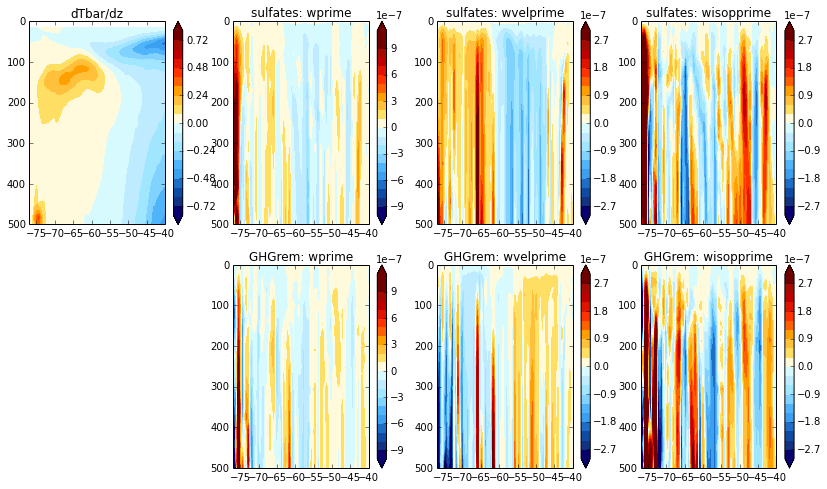

In [14]:
printtofile=True

meshlats,meshdz = np.meshgrid(np.squeeze(tlat[:,1]),zt[1:]/100.)

cmlen=float(20)
ylims = (0,500)
xlims = (-77,-40)

fig = plt.figure()
fig.set_size_inches(14,8)

"""ax = fig.add_subplot(151)
plt.pcolor(meshlats,meshdz,tmpdtbar,cmap='blue2red_20')
plt.colorbar()
ax.set_ylim((0,3000))
ax.set_xlim((-80, -40))
ax.invert_yaxis()"""

cmax=.8; cmin=-.8
incr = (cmax-cmin) / (cmlen)
conts = np.arange(cmin,cmax+incr,incr)

ax = fig.add_subplot(241)
#plt.pcolor(meshlats,meshdz,dtbarsave,cmap='blue2red_20',vmin=-1,vmax=1)
plt.contourf(meshlats,meshdz,dtbarsave,cmap='blue2red_20',vmin=cmin,vmax=cmax,levels=conts,extend='both')
plt.colorbar()
ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.invert_yaxis()
ax.set_title('dTbar/dz')

cmax=1e-6; cmin=-1e-6
incr = (cmax-cmin) / (cmlen)
conts = np.arange(cmin,cmax+incr,incr)

ax = fig.add_subplot(242)
#plt.pcolor(tlats,zlevs,wprime,cmap='blue2red_20',vmin=-1e-6,vmax=1e-6)
plt.contourf(tlats,zlevs,wprime,cmap='blue2red_20',vmin=cmin,vmax=cmax,levels=conts,extend='both')
plt.colorbar()
ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.invert_yaxis()
ax.set_title('sulfates: wprime')

cmax=3e-7; cmin=-3e-7
incr = (cmax-cmin) / (cmlen)
conts = np.arange(cmin,cmax+incr,incr)

ax = fig.add_subplot(243)
#plt.pcolor(tlats,zlevs,wvelprime,cmap='blue2red_20',vmin=-3e-7,vmax=3e-7)
plt.contourf(tlats,zlevs,wvelprime,cmap='blue2red_20',vmin=cmin,vmax=cmax,levels=conts,extend='both')
plt.colorbar()
ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.invert_yaxis()
ax.set_title('sulfates: wvelprime')

cmax=3e-7; cmin=-3e-7
incr = (cmax-cmin) / (cmlen)
conts = np.arange(cmin,cmax+incr,incr)

ax = fig.add_subplot(244)
#plt.pcolor(tlats,zlevs,wisopprime,cmap='blue2red_20',vmin=-3e-7,vmax=3e-7)
plt.contourf(tlats,zlevs,wisopprime,cmap='blue2red_20',vmin=cmin,vmax=cmax,levels=conts,extend='both')
plt.colorbar()
ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.invert_yaxis()
ax.set_title('sulfates: wisopprime')

# do GHGrem =================
cmax=1e-6; cmin=-1e-6
incr = (cmax-cmin) / (cmlen)
conts = np.arange(cmin,cmax+incr,incr)

ax = fig.add_subplot(246)
plt.contourf(tlats,zlevs,wprime2,cmap='blue2red_20',vmin=cmin,vmax=cmax,levels=conts,extend='both')
plt.colorbar()
ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.invert_yaxis()
ax.set_title('GHGrem: wprime')

cmax=3e-7; cmin=-3e-7
incr = (cmax-cmin) / (cmlen)
conts = np.arange(cmin,cmax+incr,incr)

ax = fig.add_subplot(247)
plt.contourf(tlats,zlevs,wvelprime2,cmap='blue2red_20',vmin=cmin,vmax=cmax,levels=conts,extend='both')
plt.colorbar()
ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.invert_yaxis()
ax.set_title('GHGrem: wvelprime')

cmax=3e-7; cmin=-3e-7
incr = (cmax-cmin) / (cmlen)
conts = np.arange(cmin,cmax+incr,incr)

ax = fig.add_subplot(248)
plt.contourf(tlats,zlevs,wisopprime2,cmap='blue2red_20',vmin=cmin,vmax=cmax,levels=conts,extend='both')
plt.colorbar()
ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.invert_yaxis()
ax.set_title('GHGrem: wisopprime')

if printtofile:
    fig.savefig('dTbardz_Wcomps_Sulf_GHGrem_subplotSHzm.pdf')


### Figure 10a: components of heat trans calc for sulfates/GHGrem runs: climo dT/dz; anomalous WVEL+WISOP; anom WVEL; anom WISOP

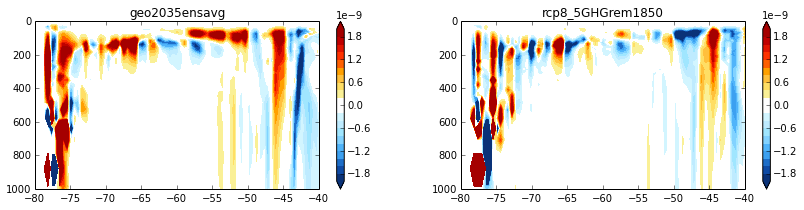

In [15]:
# w*dTbar/dz

meshlats,meshdz = np.meshgrid(np.squeeze(tlat[:,1]),zt[1:]/100.)
cmap='blue2red_w20'
cmin=-2e-9; cmax=2e-9

cmlen=float(20)
incr = (cmax-cmin) / (cmlen)
conts = np.arange(cmin,cmax+incr,incr)



fig = plt.figure()
fig.set_size_inches(14,3)
ax = fig.add_subplot(121)
CF1 = plt.contourf(meshlats,meshdz,wtrans,cmap=cmap,vmin=cmin,vmax=cmax,levels=conts,extend='both')

ax.set_ylim((0,1000))
ax.invert_yaxis()
ax.set_xlim((-80,-40))
cbar = fig.colorbar(CF1)
ax.set_title(casenamep)


ax2 = fig.add_subplot(122)
CF2 = plt.contourf(meshlats,meshdz,wtrans2,cmap=cmap,vmin=cmin,vmax=cmax,levels=conts,extend='both')

ax2.set_ylim((0,1000))
ax2.invert_yaxis()
ax2.set_xlim((-80,-40))
cbar = fig.colorbar(CF2)
ax2.set_title(casenamep2)


### Fig. 10b: This should be heating rate (K/s) at each level for sulfate engineering (left) and GHG removal (right)

86400


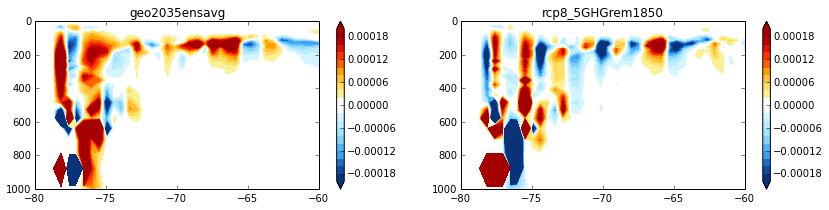

In [16]:
# w dTbar/dz ZOOM
s2day = 60*60*24
print s2day

cmin=-2e-4; cmax=2e-4
cmlen=float(20)
incr = (cmax-cmin) / (cmlen)
conts = np.arange(cmin,cmax+incr,incr)


fig = plt.figure()
fig.set_size_inches(14,3)
ax = fig.add_subplot(121)
CF1 = plt.contourf(meshlats,meshdz,wtrans*s2day,cmap=cmap,vmin=cmin,vmax=cmax,levels=conts,extend='both')

ax.set_ylim((0,1000))
ax.invert_yaxis()
ax.set_xlim((-80,-60))
ax.set_title(casenamep)
cbar = fig.colorbar(CF1)


ax2 = fig.add_subplot(122)
CF2 = plt.contourf(meshlats,meshdz,wtrans2*s2day,cmap=cmap,vmin=cmin,vmax=cmax,levels=conts,extend='both')

ax2.set_ylim((0,1000))
ax2.invert_yaxis()
ax2.set_xlim((-80,-60))
ax2.set_title(casenamep2)
cbar = fig.colorbar(CF2)



### Fig. 11: same as Fig. 10 but in K/day and zoomed in a little bit more (having trouble getting rid of spurious data in lower left)

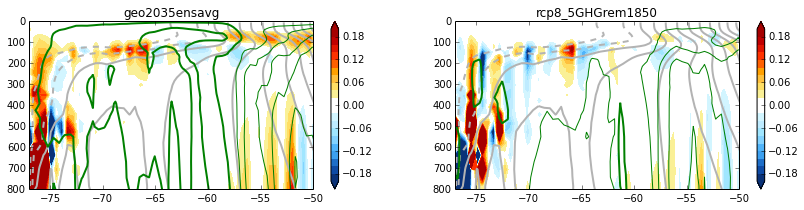

In [24]:
printtofile=True

rho_sw=cnc.getNCvar(filenamec,'rho_sw')
cp_sw = cnc.getNCvar(filenamec,'cp_sw')
rhocp = 1e-1*cp_sw*rho_sw # [J/K/m^3]

# tile the layer thickness on T grid
dzttile = np.tile(dzt,(wtrans.shape[1],1))
dzttile = np.transpose(dzttile)

xlims=(-77,-50)
ylims=(0,800)

# for vertical heat trans W/m2
cmin=-.2; cmax=.2
cmlen=float(20)
incr = (cmax-cmin) / (cmlen)
conts = np.arange(cmin,cmax+incr,incr)


fig = plt.figure()
fig.set_size_inches(14,3)
ax = fig.add_subplot(121)
CF1 = plt.contourf(meshlats,meshdz,wtrans*rhocp*dzttile,cmap=cmap,vmin=cmin,vmax=cmax,levels=conts,extend='both')

# ---- add TEMP contours
tcmin=-2; tcmax=8
cmlen=float(15)
incr = (tcmax-tcmin) / (cmlen)
tconts = np.arange(tcmin,tcmax+incr,incr)

CS1 = plt.contour(tlats,zlevs,tempc,vmin=tcmin,vmax=tcmax,levels=tconts,colors='0.7',linewidths=2)

# ---- Add MOC contours
# contours for MOC anomaly
contspd = np.arange(.1,5,.5) # pos
contsnd = np.arange(-5,-.1,.5) # neg
# total MOC
plotmoc = (totmocp[0,0,1,...]+totmocp[0,0,0,...])-(totmocc[0,0,1,...]+totmocc[0,0,0,...]) # Eulerian+eddy-induced
plotmoc2 = (totmocp2[0,0,1,...]+totmocp2[0,0,0,...])-(totmocc[0,0,1,...]+totmocc[0,0,0,...]) # Eulerian+eddy-induced


CSm = plt.contour(lats,levs,plotmoc,contspd,\
            colors='g',linestyles='solid',linewidths=2)
#plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CSm = plt.contour(lats,levs,plotmoc,contsnd,\
            colors='g',linestyles='solid')

ax.set_ylim(ylims)
ax.invert_yaxis()
ax.set_xlim(xlims)
ax.set_title(casenamep)
cbar = fig.colorbar(CF1)


ax2 = fig.add_subplot(122)
CF2 = plt.contourf(meshlats,meshdz,wtrans2*rhocp*dzttile,cmap=cmap,vmin=cmin,vmax=cmax,levels=conts,extend='both')
CS2 = plt.contour(tlats,zlevs,tempc,vmin=tcmin,vmax=tcmax,levels=tconts,colors='0.7',linewidths=2)

CSm2 = plt.contour(lats,levs,plotmoc2,contspd,\
            colors='g',linestyles='solid',linewidths=2)
#plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CSm2 = plt.contour(lats,levs,plotmoc2,contsnd,\
            colors='g',linestyles='solid')

ax2.set_ylim(ylims)
ax2.invert_yaxis()
ax2.set_xlim(xlims)
ax2.set_title(casenamep2)
cbar = fig.colorbar(CF2)

if printtofile:
    fig.savefig('MOCeul+eddanom_climoTEMPcont_vertheattrans_subplotSH_ylim' + str(ylims[1]) + '.pdf')

### Fig. 12: Same as 10, but multiply by layer thickness to convert to W/m2 in each grid cell. Overlaid with climo TEMP contours (gray) and anomalous eulerian MOC (green)

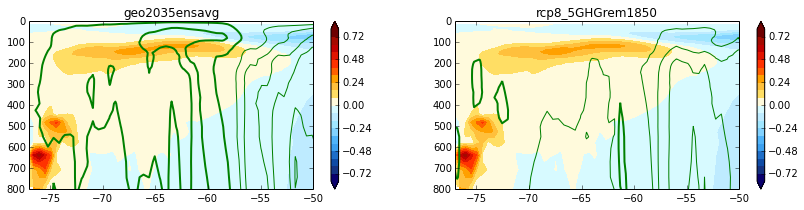

In [27]:
printtofile=True

# plot MOC contours over dTbar/dz
rho_sw=cnc.getNCvar(filenamec,'rho_sw')
cp_sw = cnc.getNCvar(filenamec,'cp_sw')
rhocp = 1e-1*cp_sw*rho_sw # [J/K/m^3]

# tile the layer thickness on T grid
dzttile = np.tile(dzt,(wtrans.shape[1],1))
dzttile = np.transpose(dzttile)

xlims=(-77,-50)
ylims=(0,800)

cmlen=float(20)


fig = plt.figure()
fig.set_size_inches(14,3)
ax = fig.add_subplot(121)
# dTbar/dz here ==============

cmax=.8; cmin=-.8
incr = (cmax-cmin) / (cmlen)
conts = np.arange(cmin,cmax+incr,incr)

#plt.pcolor(meshlats,meshdz,dtbarsave,cmap='blue2red_20',vmin=-1,vmax=1)
plt.contourf(meshlats,meshdz,dtbarsave,cmap='blue2red_20',vmin=cmin,vmax=cmax,levels=conts,extend='both')
plt.colorbar()
ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.invert_yaxis()
#ax.set_title('dTbar/dz')

# ---- Add MOC contours
# contours for MOC anomaly
contspd = np.arange(.1,5,.5) # pos
contsnd = np.arange(-5,-.1,.5) # neg
# total MOC
plotmoc = (totmocp[0,0,1,...]+totmocp[0,0,0,...])-(totmocc[0,0,1,...]+totmocc[0,0,0,...]) # Eulerian+eddy-induced
plotmoc2 = (totmocp2[0,0,1,...]+totmocp2[0,0,0,...])-(totmocc[0,0,1,...]+totmocc[0,0,0,...]) # Eulerian+eddy-induced


CSm = plt.contour(lats,levs,plotmoc,contspd,\
            colors='g',linestyles='solid',linewidths=2)
#plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CSm = plt.contour(lats,levs,plotmoc,contsnd,\
            colors='g',linestyles='solid')

ax.set_ylim(ylims)
ax.invert_yaxis()
ax.set_xlim(xlims)
ax.set_title(casenamep)


ax2 = fig.add_subplot(122)
cmax=.8; cmin=-.8
incr = (cmax-cmin) / (cmlen)
conts = np.arange(cmin,cmax+incr,incr)

#plt.pcolor(meshlats,meshdz,dtbarsave,cmap='blue2red_20',vmin=-1,vmax=1)
plt.contourf(meshlats,meshdz,dtbarsave,cmap='blue2red_20',vmin=cmin,vmax=cmax,levels=conts,extend='both')
plt.colorbar()
ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.invert_yaxis()
#ax.set_title('dTbar/dz')

CSm2 = plt.contour(lats,levs,plotmoc2,contspd,\
            colors='g',linestyles='solid',linewidths=2)
#plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CSm2 = plt.contour(lats,levs,plotmoc2,contsnd,\
            colors='g',linestyles='solid')

ax2.set_ylim(ylims)
ax2.invert_yaxis()
ax2.set_xlim(xlims)
ax2.set_title(casenamep2)

if printtofile:
    fig.savefig('MOCeul+eddanom_dTbardz_subplotSH_ylim' + str(ylims[1]) + '.pdf')

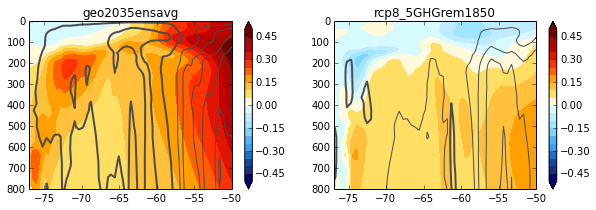

In [32]:
printtofile=True

# plot MOC contours over T anomaly
rho_sw=cnc.getNCvar(filenamec,'rho_sw')
cp_sw = cnc.getNCvar(filenamec,'cp_sw')
rhocp = 1e-1*cp_sw*rho_sw # [J/K/m^3]


xlims=(-77,-50)
ylims=(0,800)

cmlen=float(20)


fig = plt.figure()
fig.set_size_inches(10,3)
ax = fig.add_subplot(121)
# dTbar/dz here ==============

cmax=.5; cmin=-.5
incr = (cmax-cmin) / (cmlen)
conts = np.arange(cmin,cmax+incr,incr)

#plt.pcolor(meshlats,meshdz,dtbarsave,cmap='blue2red_20',vmin=-1,vmax=1)
plt.contourf(tlats,zlevs,tempp-tempc,cmap='blue2red_20',vmin=cmin,vmax=cmax,levels=conts,extend='both')
plt.colorbar()
ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.invert_yaxis()
#ax.set_title('dTbar/dz')

# ---- Add MOC contours
# contours for MOC anomaly
contspd = np.arange(.1,5,.5) # pos
contsnd = np.arange(-5,-.1,.5) # neg
# total MOC
plotmoc = (totmocp[0,0,1,...]+totmocp[0,0,0,...])-(totmocc[0,0,1,...]+totmocc[0,0,0,...]) # Eulerian+eddy-induced
plotmoc2 = (totmocp2[0,0,1,...]+totmocp2[0,0,0,...])-(totmocc[0,0,1,...]+totmocc[0,0,0,...]) # Eulerian+eddy-induced


CSm = plt.contour(lats,levs,plotmoc,contspd,\
            colors='.3',linestyles='solid',linewidths=2)
#plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CSm = plt.contour(lats,levs,plotmoc,contsnd,\
            colors='.3',linestyles='solid')

ax.set_ylim(ylims)
ax.invert_yaxis()
ax.set_xlim(xlims)
ax.set_title(casenamep)


ax2 = fig.add_subplot(122)
cmax=.5; cmin=-.5
incr = (cmax-cmin) / (cmlen)
conts = np.arange(cmin,cmax+incr,incr)

#plt.pcolor(meshlats,meshdz,dtbarsave,cmap='blue2red_20',vmin=-1,vmax=1)
plt.contourf(tlats,zlevs,tempp2-tempc,cmap='blue2red_20',vmin=cmin,vmax=cmax,levels=conts,extend='both')
plt.colorbar()
ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.invert_yaxis()
#ax.set_title('dTbar/dz')

CSm2 = plt.contour(lats,levs,plotmoc2,contspd,\
            colors='.3',linestyles='solid',linewidths=2)
#plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CSm2 = plt.contour(lats,levs,plotmoc2,contsnd,\
            colors='.3',linestyles='solid')

ax2.set_ylim(ylims)
ax2.invert_yaxis()
ax2.set_xlim(xlims)
ax2.set_title(casenamep2)

if printtofile:
    fig.savefig('MOCeul+eddanom_TEMPanom_subplotSH_ylim' + str(ylims[1]) + '.pdf')

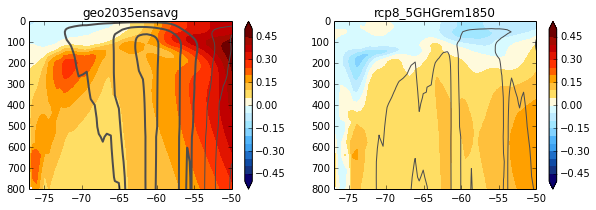

In [33]:
printtofile=True

# plot MOC contours over T anomaly
rho_sw=cnc.getNCvar(filenamec,'rho_sw')
cp_sw = cnc.getNCvar(filenamec,'cp_sw')
rhocp = 1e-1*cp_sw*rho_sw # [J/K/m^3]


xlims=(-77,-50)
ylims=(0,800)

cmlen=float(20)


fig = plt.figure()
fig.set_size_inches(10,3)
ax = fig.add_subplot(121)
# dTbar/dz here ==============

cmax=.5; cmin=-.5
incr = (cmax-cmin) / (cmlen)
conts = np.arange(cmin,cmax+incr,incr)

#plt.pcolor(meshlats,meshdz,dtbarsave,cmap='blue2red_20',vmin=-1,vmax=1)
plt.contourf(tlats,zlevs,tempp-tempc,cmap='blue2red_20',vmin=cmin,vmax=cmax,levels=conts,extend='both')
plt.colorbar()
ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.invert_yaxis()
#ax.set_title('dTbar/dz')

# ---- Add MOC contours
# contours for MOC anomaly
contspd = np.arange(.1,5,.5) # pos
contsnd = np.arange(-5,-.1,.5) # neg
# total MOC
plotmoc = (totmocp[0,0,0,...])-(totmocc[0,0,0,...]) # Eulerian
plotmoc2 = (totmocp2[0,0,0,...])-(totmocc[0,0,0,...]) # Eulerian


CSm = plt.contour(lats,levs,plotmoc,contspd,\
            colors='.3',linestyles='solid',linewidths=2)
#plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CSm = plt.contour(lats,levs,plotmoc,contsnd,\
            colors='.3',linestyles='solid')

ax.set_ylim(ylims)
ax.invert_yaxis()
ax.set_xlim(xlims)
ax.set_title(casenamep)


ax2 = fig.add_subplot(122)
cmax=.5; cmin=-.5
incr = (cmax-cmin) / (cmlen)
conts = np.arange(cmin,cmax+incr,incr)

#plt.pcolor(meshlats,meshdz,dtbarsave,cmap='blue2red_20',vmin=-1,vmax=1)
plt.contourf(tlats,zlevs,tempp2-tempc,cmap='blue2red_20',vmin=cmin,vmax=cmax,levels=conts,extend='both')
plt.colorbar()
ax.set_ylim(ylims)
ax.set_xlim(xlims)
ax.invert_yaxis()
#ax.set_title('dTbar/dz')

CSm2 = plt.contour(lats,levs,plotmoc2,contspd,\
            colors='.3',linestyles='solid',linewidths=2)
#plt.clabel(CS1,fmt = '%2.1f',inline=1,fontsize=10)
CSm2 = plt.contour(lats,levs,plotmoc2,contsnd,\
            colors='.3',linestyles='solid')

ax2.set_ylim(ylims)
ax2.invert_yaxis()
ax2.set_xlim(xlims)
ax2.set_title(casenamep2)

if printtofile:
    fig.savefig('MOCeulanom_TEMPanom_subplotSH_ylim' + str(ylims[1]) + '.pdf')

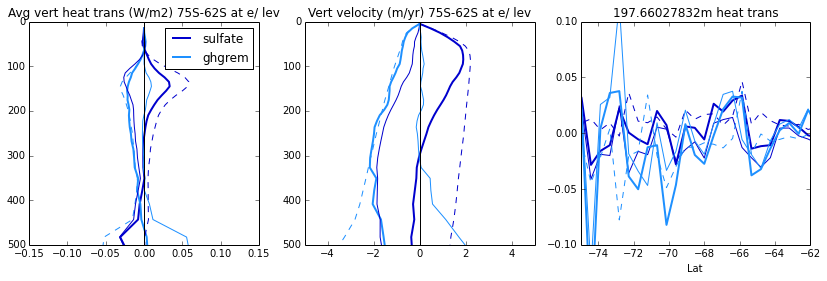

In [22]:
import cccmacmaps as ccm

printtofile=True

# note, these don't appear to be area-weighted (the plots averaging b/w lats for e/ depth) @@
sec2yr = s2day*365

mediumblue = ccm.get_linecolor('mediumblue') # Sulf
dodgerblue = ccm.get_linecolor('dodgerblue') # GHGrem
firebrick = ccm.get_linecolor('firebrick') # RCP8.5
                  
onelat = tlat[:,1]
totw = wtrans*rhocp*dzttile
totw2 = wtrans2*rhocp*dzttile
totwv = wtranswv*rhocp*dzttile
totwv2 = wtranswv2*rhocp*dzttile
totwi = wtranswi*rhocp*dzttile
totwi2 = wtranswi2*rhocp*dzttile

"""totwL450 = np.squeeze(totw[30,...]) # 408m depth using zlevs
totw2L450 = np.squeeze(totw2[30,...])
totwvL450 = np.squeeze(totwv[30,...]) 
totwv2L450 = np.squeeze(totwv2[30,...]) 
totwiL450 = np.squeeze(totwi[30,...]) 
totwi2L450 = np.squeeze(totwi2[30,...]) """

ylim=500
dep=19 # 197m depth using zlevs (in meters already)
#dep=15 # 155m depth using zlevs
totwL1 = np.squeeze(wtrans[dep,...]) 
totw2L1 = np.squeeze(wtrans2[dep,...])
totwvL1 = np.squeeze(wtranswv[dep,...]) 
totwv2L1 = np.squeeze(wtranswv2[dep,...]) 
totwiL1 = np.squeeze(wtranswi[dep,...]) 
totwi2L1 = np.squeeze(wtranswi2[dep,...])

"""dep=22 #
totwL450 = np.squeeze(wtrans[dep,...]) # 236m depth using zlevs
totw2L450 = np.squeeze(wtrans2[dep,...])
totwvL450 = np.squeeze(wtranswv[dep,...]) 
totwv2L450 = np.squeeze(wtranswv2[dep,...]) 
totwiL450 = np.squeeze(wtranswi[dep,...]) 
totwi2L450 = np.squeeze(wtranswi2[dep,...])

dep=26 # 
totwL200 = np.squeeze(totw[dep,...]) # 305m depth using zlevs
totw2L200 = np.squeeze(totw2[dep,...])
totwvL200 = np.squeeze(totwv[dep,...]) 
totwv2L200 = np.squeeze(totwv2[dep,...]) 
totwiL200 = np.squeeze(totwi[dep,...]) 
totwi2L200 = np.squeeze(totwi2[dep,...]) """



# trying to avoid cells too far south 
Nlim=-62
Slim=-75
totw = np.mean(totw[:,np.logical_and(onelat<= Nlim,onelat>Slim)],axis=1)
totw2 = np.mean(totw2[:,np.logical_and(onelat<=Nlim,onelat>Slim)],axis=1)
totwv = np.mean(totwv[:,np.logical_and(onelat<= Nlim,onelat>Slim)],axis=1)
totwv2 = np.mean(totwv2[:,np.logical_and(onelat<=Nlim,onelat>Slim)],axis=1)
totwi = np.mean(totwi[:,np.logical_and(onelat<= Nlim,onelat>Slim)],axis=1)
totwi2 = np.mean(totwi2[:,np.logical_and(onelat<=Nlim,onelat>Slim)],axis=1)

wavg=np.mean(wprime[:,np.logical_and(onelat<= Nlim,onelat>Slim)],axis=1)
wavg2=np.mean(wprime2[:,np.logical_and(onelat<= Nlim,onelat>Slim)],axis=1)
wvavg=np.mean(wvelprime[:,np.logical_and(onelat<= Nlim,onelat>Slim)],axis=1)
wvavg2=np.mean(wvelprime2[:,np.logical_and(onelat<= Nlim,onelat>Slim)],axis=1)
wiavg=np.mean(wisopprime[:,np.logical_and(onelat<= Nlim,onelat>Slim)],axis=1)
wiavg2=np.mean(wisopprime2[:,np.logical_and(onelat<= Nlim,onelat>Slim)],axis=1)


fig2 = plt.figure()
fig2.set_size_inches(14,4)
ax = fig2.add_subplot(131)

plt.plot(totw,zt[1:]/100.,color=mediumblue,linewidth=2)
plt.plot(totw2,zt[1:]/100.,color=dodgerblue,linewidth=2) # GHGrem
plt.plot(totwv,zt[1:]/100.,color=mediumblue,linestyle='--')
plt.plot(totwv2,zt[1:]/100.,color=dodgerblue,linestyle='--')
plt.plot(totwi,zt[1:]/100.,color=mediumblue)
plt.plot(totwi2,zt[1:]/100.,color=dodgerblue)

plt.plot([0,0],[0,1000],'k')
plt.legend(('sulfate','ghgrem'))
plt.ylim((0,ylim))
plt.xlim(-.15,.15)
plt.title('Avg vert heat trans (W/m2) ' + str(np.abs(Slim)) + 'S-' + str(np.abs(Nlim)) + 'S at e/ lev')
ax.invert_yaxis()


ax2=fig2.add_subplot(132)
plt.plot(wavg*sec2yr,zt/100.,color=mediumblue,linewidth=2)
plt.plot(wavg2*sec2yr,zt/100.,color=dodgerblue,linewidth=2)
plt.plot(wvavg*sec2yr,zt/100.,color=mediumblue,linestyle='--')
plt.plot(wvavg2*sec2yr,zt/100.,color=dodgerblue,linestyle='--')
plt.plot(wiavg*sec2yr,zt/100.,color=mediumblue)
plt.plot(wiavg2*sec2yr,zt/100.,color=dodgerblue,)

plt.plot([0,0],[0,1000],'k')
#plt.legend(('sulfate','ghgrem'))
plt.ylim((0,ylim))
plt.xlim(-5,5)
plt.title('Vert velocity (m/yr) ' + str(np.abs(Slim)) + 'S-' + str(np.abs(Nlim)) + 'S at e/ lev')
ax2.invert_yaxis()

plottotw = totwL1; plottotw2 = totw2L1
plottotwv = totwvL1; plottotwv2 = totwv2L1
plottotwi = totwiL1; plottotwi2 = totwi2L1


ax3=fig2.add_subplot(133)
plt.plot(onelat,plottotw*sec2yr,color=mediumblue,linewidth=2)
plt.plot(onelat,plottotwv*sec2yr,color=mediumblue,linestyle='--')
plt.plot(onelat,plottotwi*sec2yr,color=mediumblue)

plt.plot(onelat,plottotw2*sec2yr,color=dodgerblue,linewidth=2)
plt.plot(onelat,plottotwv2*sec2yr,color=dodgerblue,linestyle='--')
plt.plot(onelat,plottotwi2*sec2yr,color=dodgerblue)

ax3.set_title(str(zlevs[dep,1]) + 'm heat trans')
ax3.set_xlabel('Lat')
ax3.set_xlim((Slim,Nlim))
ax3.set_ylim((-.1,.1))

if printtofile:
    fig2.savefig('vertheattrans_wvels_' + str(np.abs(Slim)) + 'S-' + str(np.abs(Nlim)) + 
                 'S_lev' + str(zlevs[dep,1]) + '_ylim' + str(ylim) + '.pdf')


### Fig. 13: Average vertical heat trans (W/m2) between given lats, at each depth. Thick line is using WVEL+WISOP anom to calculate, dashed line is using WVEL only, thin solid is using WISOP only

In [ ]:
#include only ocean grid cells
#zmtemp = plotfld.*ofrac./1;
#zmfld = squeeze(mean(zmtemp,2));

shfc = cnc.getNCvar(filenamec,'SHF')
shfp = cnc.getNCvar(filenamep,'SHF')
shfp2 = cnc.getNCvar(filenamep2,'SHF')

tlon = cnc.getNCvar(filenamec,'TLONG')
tlon.shape
tarea=cnc.getNCvar(filenamec,'TAREA')
kmt=cnc.getNCvar(filenamec,'KMT') # k Index of Deepest Grid Cell on T Grid" . index of 0 means land at sfc